In [1]:
import subprocess
import sys
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
result = subprocess.run(
    [sys.executable, "parallel_runner.py"],
    capture_output=True,
    text=True
)

print("=== STDOUT ===")
print(result.stdout)
print("\n=== STDERR ===")
print(result.stderr)

=== STDOUT ===

--- Epsilon 2.25 STDOUT ---
[2025-07-01 23:29:11.521079] Starting epsilon: 2.25
[2025-07-02 01:05:32.378808] Finished epsilon: 2.25 | Time: 5780.86 sec


--- Epsilon 2.25 STDERR ---
C:\Users\12822\AppData\Local\Programs\Python\Python313\Lib\site-packages\arviz\stats\stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.41 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\12822\AppData\Local\Programs\Python\Python313\Lib\site-packages\arviz\stats\stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.41 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work

In [3]:
result_files = sorted(glob.glob("result_eps_*.npy"))
results = np.array([np.load(f) for f in result_files])
results = results[results[:,0].argsort()]

epsilons = results[:,0]
margliks = results[:,1]
elpds = results[:,2]
ses = results[:,3]

print(f"\n{'Epsilon':>10}  {'MargLik':>25}  {'ELPD':>25}  {'SE':>25}")
print("-" * 90)
for eps, marg, elpd, se in zip(epsilons, margliks, elpds, ses):
    print(f"{eps:10.2f}  {marg:25.10f}  {elpd:25.10f}  {se:25.10f}")


   Epsilon                    MargLik                       ELPD                         SE
------------------------------------------------------------------------------------------
      2.25            -460.5176062628            -460.5177456985               0.0381631886
      3.00            -460.5173495935            -460.5174280950               0.0286307892
      4.00            -460.5172049666            -460.5172491528               0.0214778204
      8.00            -460.5170652596            -460.5170763171               0.0107424603
     16.00            -460.5170302726            -460.5170330384               0.0053721185


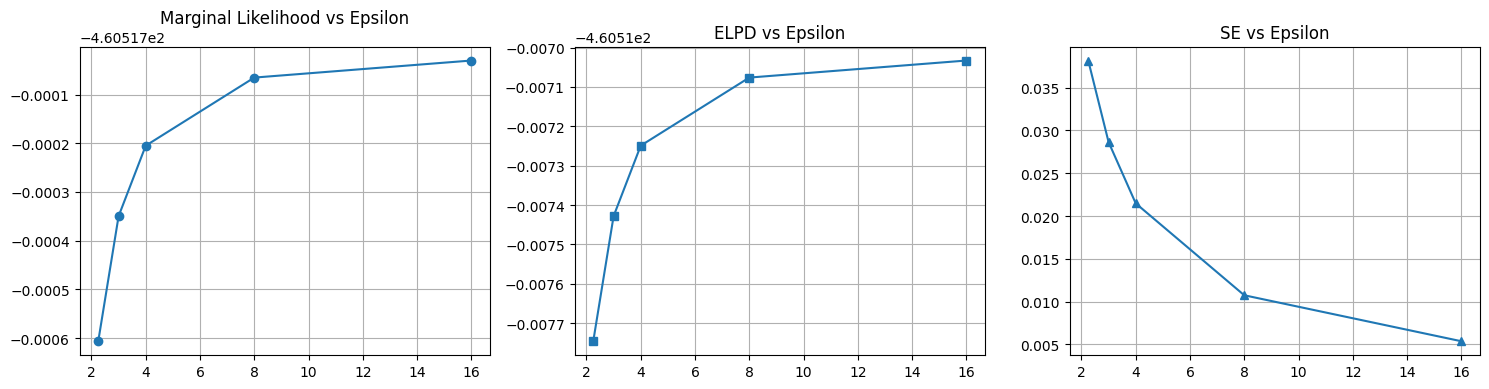

In [4]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(epsilons, margliks, marker='o')
plt.title("Marginal Likelihood vs Epsilon")
plt.grid()

plt.subplot(1,3,2)
plt.plot(epsilons, elpds, marker='s')
plt.title("ELPD vs Epsilon")
plt.grid()

plt.subplot(1,3,3)
plt.plot(epsilons, ses, marker='^')
plt.title("SE vs Epsilon")
plt.grid()

plt.tight_layout()
plt.show()